In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from skimage.io import imread, imshow, show, imshow_collection
from skimage.transform import resize, rescale, rotate

warnings.filterwarnings('ignore')

# Load Data

In [2]:
data_train_1 = pickle.load(open("data/data_train_flatten_batch_1.pkl", "rb"))
data_train_2 = pickle.load(open("data/data_train_flatten_batch_2.pkl", "rb"))
labels_train_1 = pickle.load(open("data/labels_train_batch_1.pkl", "rb"))
labels_train_2 = pickle.load(open("data/labels_train_batch_2.pkl", "rb"))

In [3]:
data_train = np.concatenate((data_train_1, data_train_2))
labels_train = np.concatenate((labels_train_1, labels_train_2))

In [4]:
data_test = pickle.load(open("data/data_test_flatten.pkl", "rb"))
labels_test = pickle.load(open("data/labels_test.pkl", "rb"))

In [5]:
# Shuffle train set
data_train, labels_train = shuffle(data_train, labels_train, random_state=25)

# Scale Data

In [6]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(data_train)
X_test_std = scaler.transform(data_test)

# PCA
We will use a 95% PCA

In [7]:
print("original number of features:", X_train_std.shape[1])
pca = PCA(0.95)
pca.fit(X_train_std)
print("Number of pricipal components:", pca.n_components_)

X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

original number of features: 3072
Number of pricipal components: 221


# Train Model

In [8]:
m = LogisticRegression()

parameters = [{
    "penalty": ["l1", "l2", "elasticnet", None]
}]

grid_search = GridSearchCV(m, parameters, verbose=2)
grid_search.fit(X_train_pca, labels_train)
model = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l2; total time=   9.0s
[CV] END .........................................penalty=l2; total time=   8.9s
[CV] END .........................................penalty=l2; total time=   8.9s
[CV] END .........................................penalty=l2; total time=   9.3s
[CV] END .........................................penalty=l2; total time=   9.3s
[CV] END .................................penalty=elasticnet; total time=   0.0s
[CV] END .................................penalty

In [9]:
print("Model optimal parameters".upper())
print("penalty:", model.get_params()["penalty"])

MODEL OPTIMAL PARAMETERS
penalty: l2


# Test Model

In [10]:
predictions = model.predict(X_test_pca)
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy score:", accuracy)

Accuracy score: 0.4059


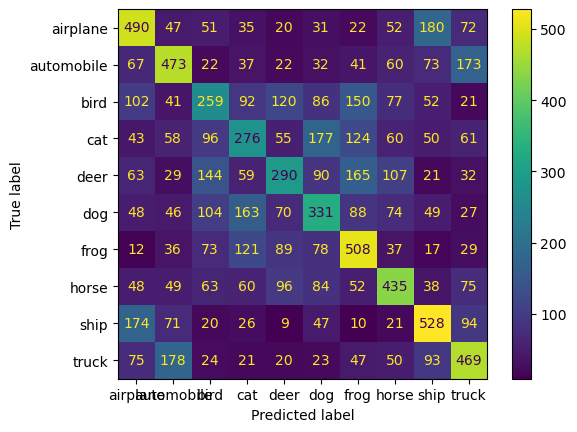

In [11]:
cm = confusion_matrix(labels_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Save Model

In [12]:
model_file_name = "logistic_regression_32x32_PCA.pkl"
pickle.dump(model, open(model_file_name, "wb"))

# Black And White

## Load data

In [13]:
train_batches = []
labels_batches = []

for i in [1, 2, 3, 4, 5]:
    data_filepath = "data/data_train_bw_flatten_batch_" + str(i) + ".pkl"
    labels_filepath = "data/labels_train_bw_batch_" + str(i) + ".pkl"
    train_batches.append(pickle.load(open(data_filepath, "rb")))
    labels_batches.append(pickle.load(open(labels_filepath, "rb")))
    
data_train_bw = np.concatenate(train_batches)
labels_train_bw = np.concatenate(labels_batches)

data_test_bw = pickle.load(open("data/data_test_bw_flatten.pkl", "rb"))
labels_test_bw = pickle.load(open("data/labels_test_bw.pkl", "rb"))

# Shuffle train set
data_train_bw, labels_train_bw = shuffle(data_train_bw, labels_train_bw, random_state=25)

## Scale data

In [14]:
scaler = StandardScaler()

X_train_std_bw = scaler.fit_transform(data_train_bw)
X_test_std_bw = scaler.transform(data_test_bw)

## PCA
We will use a 95% PCA

In [15]:
del pca
print("original number of features:", X_train_std_bw.shape[1])
pca = PCA(0.95)
pca.fit(X_train_std_bw)
print("Number of pricipal components:", pca.n_components_)

X_train_bw_pca = pca.transform(X_train_std_bw)
X_test_bw_pca = pca.transform(X_test_std_bw)

original number of features: 1024
Number of pricipal components: 163


## Train model

In [16]:
m = LogisticRegression()

parameters = [{
    "penalty": ["l1", "l2", "elasticnet", None]
}]

grid_search = GridSearchCV(m, parameters, verbose=2)
grid_search.fit(X_train_bw_pca, labels_train_bw)
model_bw = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l2; total time=   8.9s
[CV] END .........................................penalty=l2; total time=   8.5s
[CV] END .........................................penalty=l2; total time=   8.8s
[CV] END .........................................penalty=l2; total time=   8.9s
[CV] END .........................................penalty=l2; total time=   8.6s
[CV] END .................................penalty=elasticnet; total time=   0.0s
[CV] END .................................penalty

In [17]:
print("Model optimal parameters".upper())
print("penalty:", model_bw.get_params()["penalty"])

MODEL OPTIMAL PARAMETERS
penalty: l2


## Test model

In [18]:
predictions_bw = model_bw.predict(X_test_bw_pca)
accuracy_bw = accuracy_score(labels_test_bw, predictions_bw)
print("Accuracy score:", accuracy_bw)

Accuracy score: 0.3053


[]

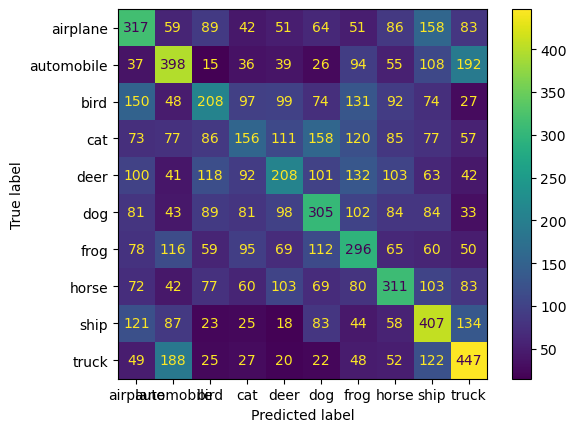

In [19]:
cm = confusion_matrix(labels_test_bw, predictions_bw, labels=model_bw.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_bw.classes_)
disp.plot()
plt.plot()

## Save model

In [20]:
model_file_name_bw = "logistic_regression_32x32_bw_PCA.pkl"
pickle.dump(model_bw, open(model_file_name_bw, "wb"))